Let's import useful packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-whitegrid')

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

Load the data.

In [5]:
data = pd.read_csv(filepath_or_buffer='task_b.csv')
display(data.head())

,index,f1,f2,f3,y
0,0,-195.871045,-14843.084171,5.532140,1.0
1,1,-1217.183964,-4068.124621,4.416082,1.0
2,2,9.138451,4413.412028,0.425317,0.0
3,3,363.824242,15474.760647,1.094119,0.0
4,4,-768.812047,-7963.932192,1.870536,0.0


In [6]:
data = data.iloc[:, 1:]
display(data.head())

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


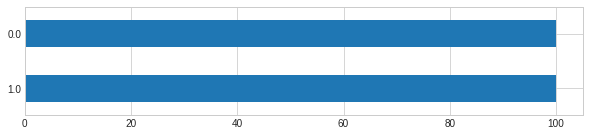

In [7]:
plt.figure(figsize=(10, 2))
data['y'].value_counts().plot(kind='barh')
plt.show()

This data is a balanced data and has two classes $0$ and $1$.

In [8]:
relation = data.corr()
display(relation.style.background_gradient(cmap='Greens'))

,f1,f2,f3,y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
y,0.067172,-0.017944,0.839060,1.000000


From this above correlation table, I have below conclusions:

1. We can see that feature __f3__ is highly positively correlated with target __y__ followed by feature __f1__.
2. We can also see that feature __f2__ is negatively correlated with target __y__.

In [9]:
display(data.std())

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

Feature importance.

In [10]:
def get_important_features(data, label, standardize=True, model='lr'):
    """
    This function returns the feature coefficients.
    """
    features = list(data.columns)
    features.remove(label)
    
    X = data.drop(labels=[label], axis=1).values
    y = data[label].values
    
    if standardize:
        std = StandardScaler()
        X = std.fit_transform(X=X)
    
    loss = 'log_loss' if model == 'lr' else 'hinge'
    clf = SGDClassifier(loss=loss)
    clf.fit(X=X, y=y)
    coefs = [abs(w) for w in clf.coef_[0]]
    fimp_dict = {f: w for (f, w) in zip(features, coefs)}
    return fimp_dict

---

__Task 1: SVC__

In [11]:
fi_1_svc = get_important_features(data=data, label='y', standardize=False, model='svc')
display(fi_1_svc)

{'f1': 3209.840691857735, 'f2': 356.9958946762686, 'f3': 11007.269523523752}

__Task 1: LR__

In [12]:
fi_1_lr = get_important_features(data=data, label='y', standardize=False, model='lr')
display(fi_1_lr)

{'f1': 6658.760522000005, 'f2': 2166.91824046244, 'f3': 10734.034208055762}

__Conclusion:__

- In `sklearn`, we can obtain the important feature by using an attribute called `coef_`.
- The feature(s) whose variance/standard deviation is less, turn out to be important feature(s) and gain big weightage.
- As the features are not standardized, their weights are very huge. Usually this is not the case when features are standardized.
- Important features:
    1. __SVC__: The __f3__ is the most important feature followed by __f1__ and the least important feature is __f2__.
        - In SVC, the best way to select important features is by forward feature selection.
    2. __LR__: The __f3__ is the most important feature followed by __f1__ and the least important feature is __f2__.
        - In LR, the weights whose value is more irrespective of the sign, is considered to be important feaure.

---

__Task 2: SVC__

In [13]:
fi_2_svc = get_important_features(data=data, label='y', standardize=True, model='svc')
display(fi_2_svc)

{'f1': 4.44318225333298, 'f2': 1.3744710016791615, 'f3': 26.892231018845628}

__Task 2: LR__

In [14]:
fi_2_lr = get_important_features(data=data, label='y', standardize=True, model='lr')
display(fi_2_lr)

{'f1': 0.0853279882523907, 'f2': 1.3305145748380753, 'f3': 9.45856346956877}

__Conclusion:__

- In `sklearn`, we can obtain the important feature by using an attribute called `coef_`.
- The features whose variance/standard deviation is less, turn out to be important features and gain more weightage.
- As the features in this task are standardized, the data becomes more stable from a feature standpoint.
- Important features:
    1. __SVC__: The __f3__ is the most important feature followed by __f1__ and the least important feature is __f2__.
        - In SVC, the best way to select important features is by forward feature selection.
    2. __LR__: The __f3__ is the most important feature followed by __f2__ and the least important feature is __f1__.
        - In LR, the weights whose value is more irrespective of the sign, is considered to be important feaure.

---

End of the file.